In [1]:
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\anast\AppData\Local\Temp\ipykernel_22192\1730689269.py:2: SyntaxWarning: invalid escape sequence '\.'
  warnings.filterwarnings( "ignore", module = "matplotlib\..*" )


In [2]:
import pandas as pd
import numpy as np

columns = ['pH', 'Hardness', 'Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity',
           'Potability']
target_column = 'Potability'

features = columns.copy()
features.remove(target_column)

In [3]:
import os

relpath = '..\\data\\water_potability.csv'
abspath = os.path.abspath(relpath)

df = pd.read_csv(abspath, header=0, names=columns)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



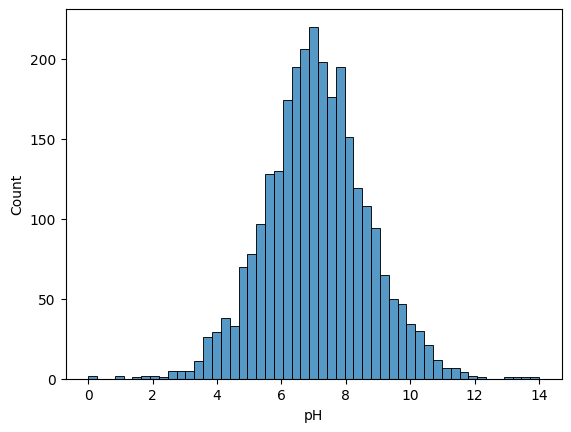

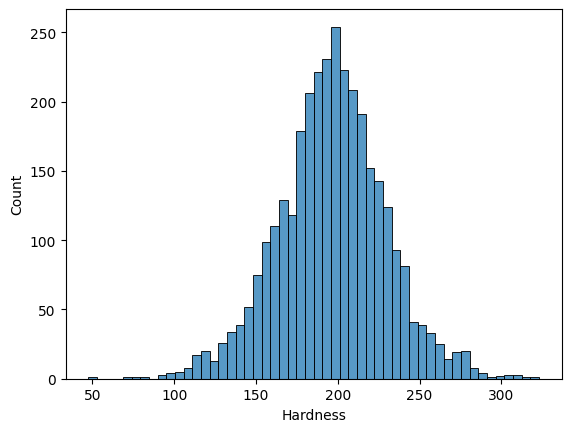

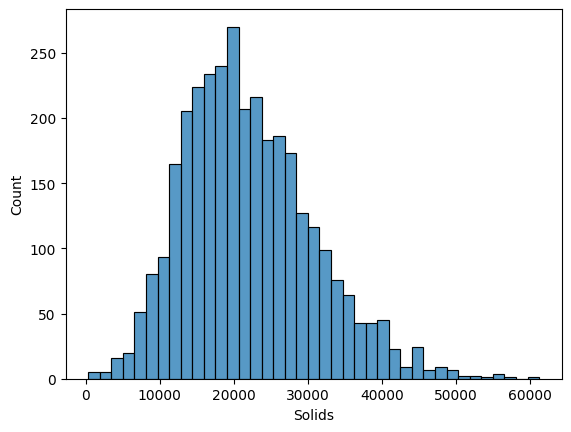

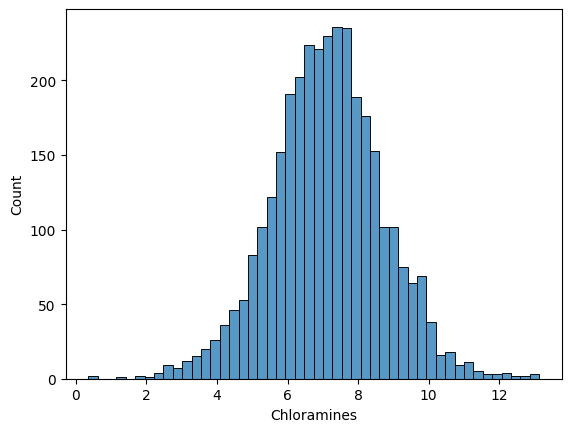

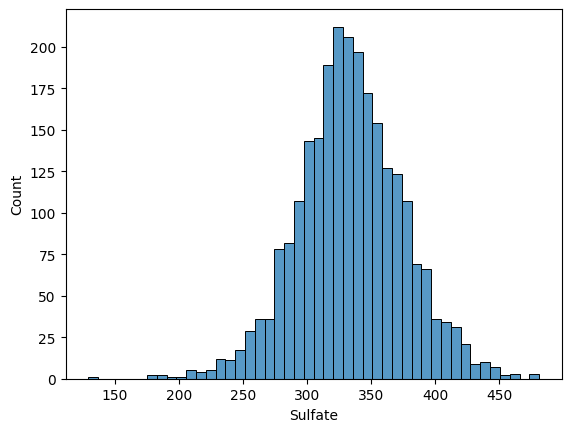

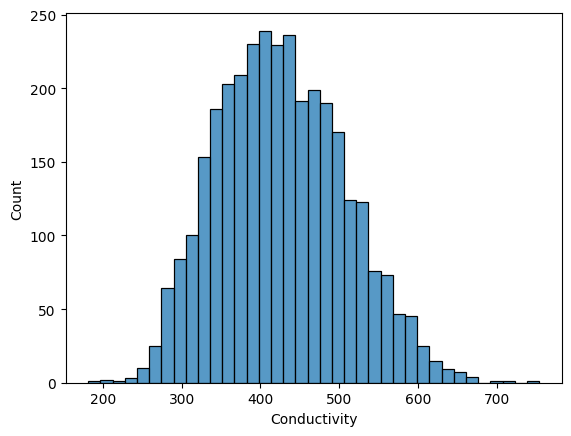

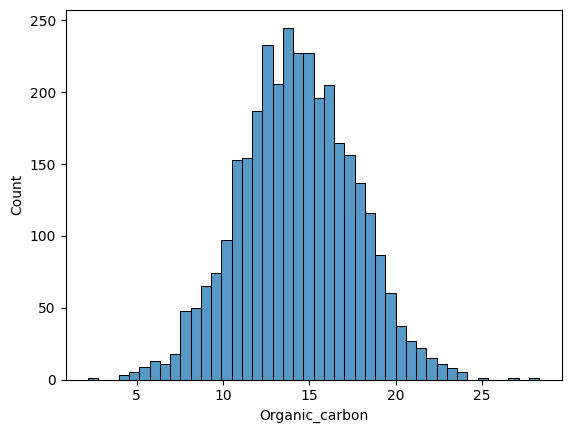

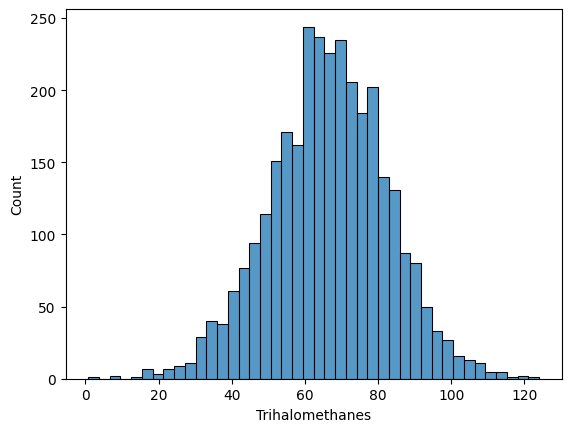

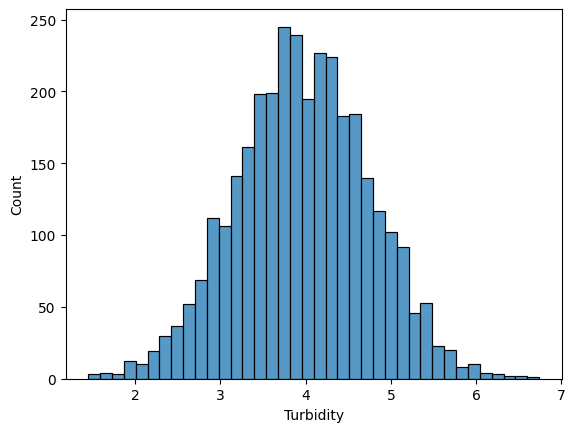

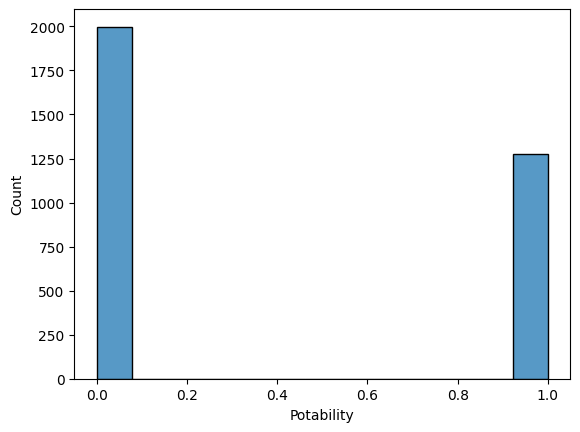

In [5]:
features_tovisualize = features.copy()
for col in features_tovisualize + [target_column]:
    plt.figure()
    sns.histplot(data=df, x=col)
    

In [6]:

duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [pH, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []


In [7]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
print(f'There are {len(numerical_features)} numerical features:')
print(numerical_features, '\n')

categorical_features = df.select_dtypes(exclude='number').columns.tolist()
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 10 numerical features:
['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'] 

There are 0 categorical features: 

[]


In [8]:
#num_features_tovisualize = numerical_features.copy()

#Kreiranje box figura za sve kolone osobina, naspram ciljne kolone
#for col in num_features_tovisualize:
#    plt.figure()
#    sns.boxplot(data=df, x=target_column, y=col, orient='v')

<Axes: >

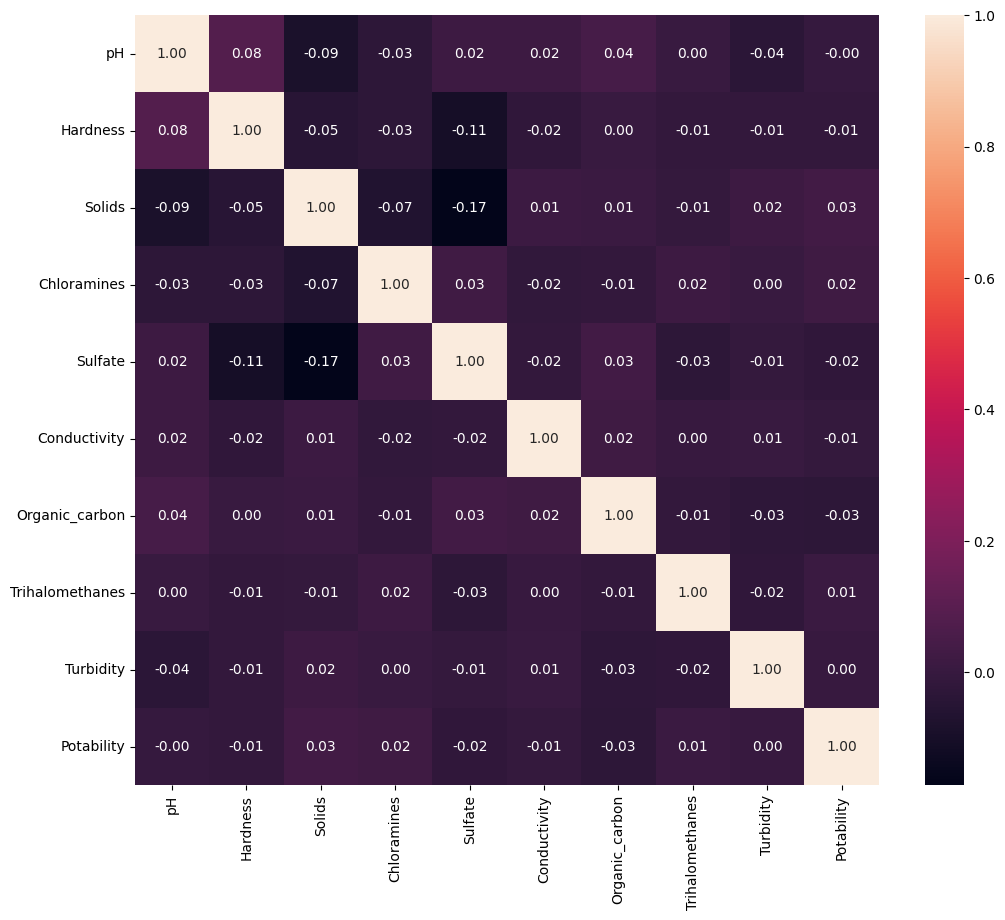

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pH               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
df.isnull().sum()


pH                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
df.describe()


,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [12]:
df[df['Trihalomethanes'].isnull()]

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


In [13]:

columns_with_nulls = df.columns[df.isnull().any()]
columns_with_nulls

Index(['pH', 'Sulfate', 'Trihalomethanes'], dtype='object')

In [14]:
rows_with_multiple_nulls = df[df.isnull().sum(axis=1) == 3]

print("Rows with more than one null value:")
rows_with_multiple_nulls.describe()

Rows with more than one null value:


,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,0.0,9.000000,9.000000,9.000000,0.0,9.000000,9.000000,0.0,9.000000,9.000000
mean,NaN,197.615548,22256.806396,6.832987,NaN,448.285723,13.164470,NaN,3.894027,0.111111
std,NaN,28.865246,11891.655823,1.436351,NaN,95.851968,3.088826,NaN,0.624907,0.333333
min,NaN,143.300200,11954.700730,4.933662,NaN,293.477998,8.816487,NaN,3.017985,0.000000
25%,NaN,184.993731,16162.262307,6.087949,NaN,391.238714,11.318807,NaN,3.451740,0.000000
50%,NaN,202.079864,17777.100086,6.657053,NaN,448.846036,12.934160,NaN,3.832479,0.000000
75%,NaN,221.620058,20944.620814,7.627524,NaN,538.621803,13.744749,NaN,4.439215,0.000000
max,NaN,229.771350,44982.734155,8.898024,NaN,566.339294,19.585497,NaN,4.863378,1.000000


In [15]:
df = df.drop(rows_with_multiple_nulls.index)

In [18]:
#df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df["Trihalomethanes"].mean())
#df['Sulfate'] = df['Sulfate'].fillna(df["Sulfate"].mean())
#df = df.drop(columns = ["Sulfate"])

In [16]:
df['pH']=df['pH'].fillna(df.groupby(['Potability'])['pH'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [16]:

from sklearn.impute import KNNImputer

In [17]:
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(df)

In [18]:
df[:]= imputer.fit_transform(df_filled)

In [17]:
df.isnull().sum()

pH                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [18]:
df[df['Potability']==0].describe()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.0
mean,7.085378,196.702451,21772.552012,7.092913,334.564290,426.671628,14.372386,66.303555,3.965866,0.0
std,1.548594,31.089068,8527.779592,1.501323,32.006042,79.982881,3.336573,15.674049,0.780915,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.217350,177.756096,15663.057382,6.156857,319.266920,368.498530,12.118536,56.404562,3.444062,0.0
50%,7.085378,197.090572,20827.950711,7.090334,334.564290,422.229331,14.310837,66.303555,3.949117,0.0
75%,7.945026,216.106273,27006.249009,8.066462,348.396008,480.580767,16.660188,76.599159,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [19]:
df[df['Potability']==1].describe()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.0
mean,7.073783,195.841857,22388.784145,7.170074,332.566990,425.322500,14.156645,66.539684,3.968733,1.0
std,1.344479,35.530558,9102.961906,1.703452,41.881787,82.051309,3.261649,15.978198,0.781014,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.351287,174.480427,15668.273618,6.093750,312.982727,360.932804,12.032377,56.910254,3.430167,1.0
50%,7.073783,196.649823,21208.618285,7.217409,332.566990,420.594592,14.162010,66.539684,3.958609,1.0
75%,7.780869,218.062384,27977.673208,8.199318,354.821194,484.104784,16.352858,77.079780,4.510578,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


<Axes: >

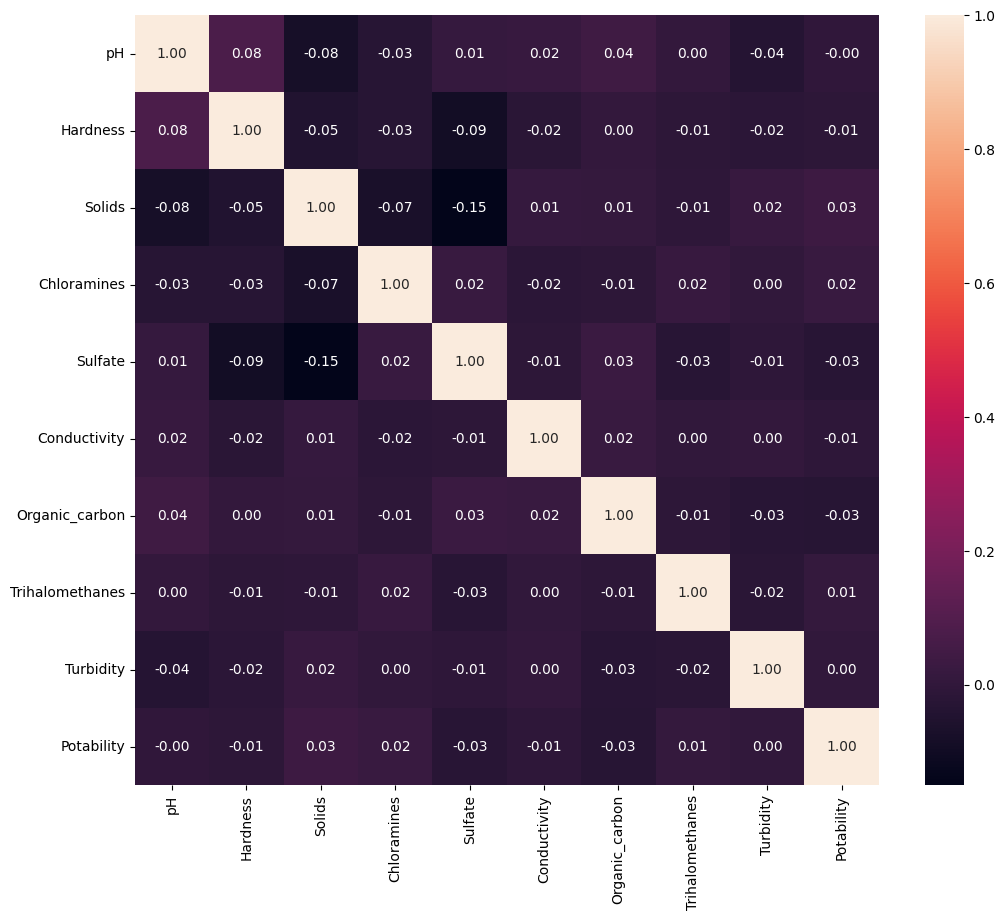

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')

In [21]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
print(f'There are {len(numerical_features)} numerical features:')
print(numerical_features, '\n')

categorical_features = df.select_dtypes(exclude='number').columns.tolist()
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 10 numerical features:
['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'] 

There are 0 categorical features: 

[]


## OutLiers

In [22]:
def outliers_iqr(x: pd.Series):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))[0]

def outliers_z_score(ys: pd.Series):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)[0]

def outliers_modified_z_score(ys: pd.Series):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    
    if median_absolute_deviation_y == 0:
        median_absolute_deviation_y = np.finfo(np.double).min
    
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)[0]


outliers = {}
print("Outliers:",' ' * 26,"IQR ZScore ModZScore")
for col in numerical_features:
    outliersIQR = outliers_iqr(df[col])
    outliersZScore = outliers_z_score(df[col])
    outliersModZScore = outliers_modified_z_score(df[col])
    outliers[col] = (outliersIQR, outliersZScore, outliersModZScore)
    print(f"Column '{col:24}': {len(outliersIQR):5} {len(outliersZScore):6} {len(outliersModZScore):9}")
print()



Outliers:                            IQR ZScore ModZScore
Column 'pH                      ':   142     27        36
Column 'Hardness                ':    83     18        13
Column 'Solids                  ':    46     20        10
Column 'Chloramines             ':    61     20        13
Column 'Sulfate                 ':   261     34       110
Column 'Conductivity            ':    11      7         1
Column 'Organic_carbon          ':    25      4         3
Column 'Trihalomethanes         ':    53     18         5
Column 'Turbidity               ':    19      8         1
Column 'Potability              ':     0      0         0



In [23]:
# Calculate Z-scores
z_scores = np.abs((df - df.mean()) / df.std())

# Define the threshold for Z-scores
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers
df_no_outliers = df[~outliers]

print("DataFrame after removing outliers using Z-Score:")
print(df_no_outliers)

DataFrame after removing outliers using Z-Score:
            pH    Hardness        Solids  Chloramines     Sulfate  \
0     7.085378  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  334.564290   
2     8.099124  224.236259  19909.541732     9.275884  334.564290   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  332.566990   
3273  9.419510  175.762646  33155.578218     7.350233  332.566990   
3274  5.126763  230.603758  11983.869376     6.303357  332.566990   
3275  7.874671  195.102299  17404.177061     7.509306  332.566990   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.

In [30]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1

# Define the lower and upper bounds
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Identify outliers
#outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Remove outliers
#df_no_outliers = df[~outliers]

#print("DataFrame after removing outliers using IQR:")
#print(df_no_outliers)

In [31]:
#features_tovisualize = features.copy()
#for col in features_tovisualize + [target_column]:
#    plt.figure()
#    sns.histplot(data=df_no_outliers, x=col)

<Axes: xlabel='Potability', ylabel='Count'>

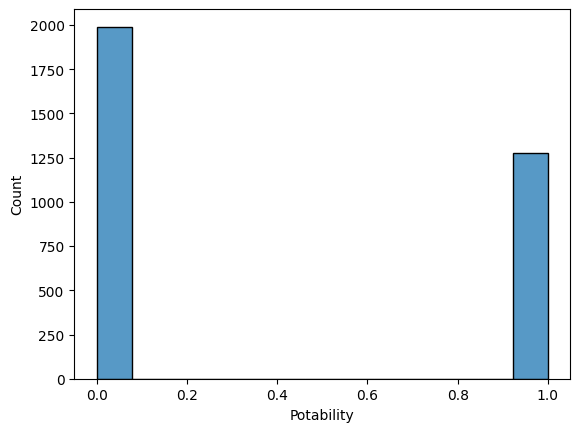

In [24]:
from sklearn.preprocessing import LabelEncoder
from pandas import get_dummies

plt.figure()
sns.histplot(data=df, x="Potability")

In [25]:
df = df_no_outliers  

In [26]:
zero  = df[df['Potability']==0] 
one = df[df['Potability']==1] 
from sklearn.utils import resample
df_minority_upsampled = resample(zero, replace = True, n_samples = 1200) 

from sklearn.utils import shuffle
df = pd.concat([one, df_minority_upsampled])
df = shuffle(df)

<Axes: ylabel='count'>

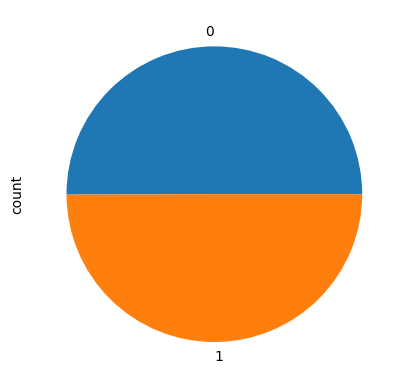

In [27]:
df.Potability.value_counts().plot(kind ='pie')

In [28]:
print('Counts of rows by class:')
print(df[target_column].value_counts())


Counts of rows by class:
Potability
0    1200
1    1198
Name: count, dtype: int64


## Preprocessing

In [29]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
print(f'There are {len(numerical_features)} numerical features:')
print(numerical_features, '\n')


There are 10 numerical features:
['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'] 



In [30]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
df[numerical_features].describe()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,7.070974,196.459834,21619.441724,7.132943,333.831782,427.441117,14.335594,66.663482,3.959967,0.499583
std,1.332521,31.818407,8407.734021,1.519951,34.666734,81.017980,3.292337,15.105784,0.766093,0.500104
min,2.690831,98.367915,728.750830,2.386653,225.516628,201.619737,4.371899,19.175175,1.641515,0.000000
25%,6.319667,177.575638,15379.965592,6.164192,316.957573,365.361346,12.094513,57.198393,3.439577,0.000000
50%,7.073783,197.492119,20515.088132,7.151972,333.052491,423.681216,14.258363,66.303555,3.959518,0.000000
75%,7.786328,216.350681,27005.760698,8.110125,350.607308,485.215443,16.664900,76.867559,4.488306,1.000000
max,11.449739,287.975540,48007.868134,11.586151,441.826777,666.690618,23.952450,113.048886,6.307678,1.000000


In [31]:
df[numerical_features].describe()
minmax_df = df.copy()
minmax_scaler = MinMaxScaler(feature_range=(0,1))
minmax_df[numerical_features] = minmax_scaler.fit_transform(df[numerical_features])

df[numerical_features].describe()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,7.070974,196.459834,21619.441724,7.132943,333.831782,427.441117,14.335594,66.663482,3.959967,0.499583
std,1.332521,31.818407,8407.734021,1.519951,34.666734,81.017980,3.292337,15.105784,0.766093,0.500104
min,2.690831,98.367915,728.750830,2.386653,225.516628,201.619737,4.371899,19.175175,1.641515,0.000000
25%,6.319667,177.575638,15379.965592,6.164192,316.957573,365.361346,12.094513,57.198393,3.439577,0.000000
50%,7.073783,197.492119,20515.088132,7.151972,333.052491,423.681216,14.258363,66.303555,3.959518,0.000000
75%,7.786328,216.350681,27005.760698,8.110125,350.607308,485.215443,16.664900,76.867559,4.488306,1.000000
max,11.449739,287.975540,48007.868134,11.586151,441.826777,666.690618,23.952450,113.048886,6.307678,1.000000


In [32]:
std_df = df.copy()
std_scaler = StandardScaler()
std_df[numerical_features] = std_scaler.fit_transform(df[numerical_features])
std_df[numerical_features].describe()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2.398000e+03,2.398000e+03,2.398000e+03,2.398000e+03,2.398000e+03,2.398000e+03,2.398000e+03,2.398000e+03,2.398000e+03,2.398000e+03
mean,-6.118727e-16,-6.755786e-16,5.926128e-18,3.540861e-16,-4.326073e-16,3.277889e-16,-7.022462e-16,-5.185362e-17,-2.074145e-16,8.889192e-18
std,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00
min,-3.287794e+00,-3.083510e+00,-2.485218e+00,-3.123311e+00,-3.125121e+00,-2.787881e+00,-3.026961e+00,-3.144373e+00,-3.026963e+00,-9.991663e-01
25%,-5.639408e-01,-5.936229e-01,-7.422663e-01,-6.374900e-01,-4.868566e-01,-7.664067e-01,-6.808383e-01,-6.267178e-01,-6.794201e-01,-9.991663e-01
50%,2.108775e-03,3.244980e-02,-1.313771e-01,1.252188e-02,-2.248419e-02,-4.641790e-02,-2.346291e-02,-2.383207e-02,-5.870641e-04,-9.991663e-01
75%,5.369543e-01,6.252669e-01,6.407722e-01,6.430376e-01,4.840094e-01,7.132537e-01,7.076407e-01,6.756488e-01,6.897976e-01,1.000834e+00
max,3.286761e+00,2.876787e+00,3.139244e+00,2.930448e+00,3.115884e+00,2.953658e+00,2.921591e+00,3.071345e+00,3.065163e+00,1.000834e+00


In [33]:
rbst_df = df.copy()
rbst_scaler = RobustScaler()
rbst_df[numerical_features] = rbst_scaler.fit_transform(df[numerical_features])
rbst_df[numerical_features].describe()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2398.000000,2398.000000,2.398000e+03,2.398000e+03,2398.000000,2.398000e+03,2.398000e+03,2398.000000,2398.000000,2398.000000
mean,-0.001916,-0.026622,9.499166e-02,-9.778685e-03,0.023159,3.137064e-02,1.689829e-02,0.018299,0.000429,0.499583
std,0.908541,0.820590,7.231965e-01,7.810910e-01,1.030223,6.759717e-01,7.203628e-01,0.767993,0.730496,0.500104
min,-2.988390,-2.556392,-1.701934e+00,-2.448860e+00,-3.195742,-1.852765e+00,-2.163157e+00,-2.396054,-2.210295,0.000000
25%,-0.514172,-0.513642,-4.417008e-01,-5.076126e-01,-0.478307,-4.865905e-01,-4.734500e-01,-0.462916,-0.495782,0.000000
50%,0.000000,0.000000,-1.564504e-16,2.283330e-16,0.000000,2.371692e-16,-1.942890e-16,0.000000,0.000000,0.000000
75%,0.485828,0.486358,5.582992e-01,4.923874e-01,0.521693,5.134095e-01,5.265500e-01,0.537084,0.504218,1.000000
max,2.983620,2.333548,2.364809e+00,2.278690e+00,3.232545,2.027544e+00,2.121065e+00,2.376579,2.239052,1.000000


In [42]:
#fig = plt.figure(figsize=(10,10))

#for i in range(len(numerical_features)):
#    plt.subplot(3,3,i+1)
#    plt.title(numerical_features[i])
#    sns.histplot(data=df,x=df[numerical_features[i]],hue='Potability')
#plt.tight_layout()
#plt.show()

In [34]:
df.groupby('Potability').mean().T

Potability,0,1
pH,7.073131,7.068813
Hardness,197.045809,195.872880
Solids,21236.809414,22002.712820
Chloramines,7.127536,7.138360
Sulfate,333.963525,333.699818
Conductivity,429.911544,424.966565
Organic_carbon,14.452281,14.218712
Trihalomethanes,66.742284,66.584549
Turbidity,3.949334,3.970618


In [35]:
X = df.drop(["Potability"],axis=1)
y = df["Potability"]

### Func

In [45]:
def calculateKFoldScore(cv_results):
    result_explained_variance = cv_results['test_explained_variance']
    result_max_error = cv_results['test_max_error']
    result_neg_mean_absolute_error = cv_results['test_neg_mean_absolute_error']
    result_neg_mean_squared_error = cv_results['test_neg_mean_squared_error']
    result_neg_root_mean_squared_error = cv_results['test_neg_root_mean_squared_error']
    result_neg_mean_squared_log_error = cv_results['test_neg_mean_squared_log_error']
    result_neg_median_absolute_error = cv_results['test_neg_median_absolute_error']
    result_r2 = cv_results['test_r2']
    result_neg_mean_poisson_deviance = cv_results['test_neg_mean_poisson_deviance']
    result_neg_mean_gamma_deviance = cv_results['test_neg_mean_gamma_deviance']
    result_neg_mean_absolute_percentage_error = cv_results['test_neg_mean_absolute_percentage_error']
    result_d2_absolute_error_score = cv_results['test_d2_absolute_error_score']
    result_d2_pinball_score = cv_results['test_d2_pinball_score']
    result_d2_tweedie_score = cv_results['test_d2_tweedie_score']
    
    print('Performance results:')
    print('Explained variance: ', np.mean(result_explained_variance))
    print('Max error: ', np.mean(result_max_error))
    print('Negative mean absolute error: ', np.mean(result_neg_mean_absolute_error))
    print('Negative mean squared error: ', np.mean(result_neg_mean_squared_error))
    print('Negative root mean squared error: ', np.mean(result_neg_root_mean_squared_error))
    print('Negative mean squared log error: ', np.mean(result_neg_mean_squared_log_error))
    print('Negative median absolute error: ', np.mean(result_neg_median_absolute_error))
    print('R2: ', np.mean(result_r2))
    print('Negative mean poisson deviance: ', np.mean(result_neg_mean_poisson_deviance))
    print('Negative mean gamma deviance: ', np.mean(result_neg_mean_gamma_deviance))
    print('Negative mean absolute percentage error: ', np.mean(result_neg_mean_absolute_percentage_error))
    print('D2 absolute error score: ', np.mean(result_d2_absolute_error_score))
    print('D2 pinball score: ', np.mean(result_d2_pinball_score))
    print('D2 tweedie score: ', np.mean(result_d2_tweedie_score))
    return {
     'Explained variance: ': np.mean(result_explained_variance),
     'Max error: ': np.mean(result_max_error),
     'Negative mean absolute error: ': np.mean(result_neg_mean_absolute_error),
     'Negative mean squared error: ': np.mean(result_neg_mean_squared_error),
     'Negative root mean squared error: ': np.mean(result_neg_root_mean_squared_error),
     'Negative mean squared log error: ': np.mean(result_neg_mean_squared_log_error),
     'R2: ': np.mean(result_r2),
    }

In [46]:
def calculateSplitScore(y_test, y_pred_test):
    result_explained_variance = explained_variance_score(y_test, y_pred_test)
    result_max_error = max_error(y_test, y_pred_test)
    result_neg_mean_absolute_error = mean_absolute_error(y_test, y_pred_test)
    result_neg_mean_squared_error = mean_squared_error(y_test, y_pred_test)
    result_neg_root_mean_squared_error = mean_squared_error(y_test, y_pred_test)
    result_neg_mean_squared_log_error = 'Non calculated' if np.any(y_test > 0) else mean_squared_log_error(y_test, y_pred_test)
    result_neg_median_absolute_error = median_absolute_error(y_test, y_pred_test)
    result_r2 = r2_score(y_test, y_pred_test)
    result_neg_mean_poisson_deviance = 'Non calculated' if np.any(y_test <= 0) else mean_poisson_deviance(y_test, y_pred_test)
    result_neg_mean_gamma_deviance = 'Non calculated' if np.any(y_test <= 0) else mean_gamma_deviance(y_test, y_pred_test)
    result_neg_mean_absolute_percentage_error = mean_absolute_percentage_error(y_test, y_pred_test)
    result_d2_absolute_error_score = d2_absolute_error_score(y_test, y_pred_test)
    result_d2_pinball_score = d2_pinball_score(y_test, y_pred_test)
    result_d2_tweedie_score = d2_tweedie_score(y_test, y_pred_test)
    
    print('Performance results:')
    print('Explained variance: ', result_explained_variance)
    print('Max error: ', result_max_error)
    print('Mean absolute error: ', result_neg_mean_absolute_error)
    print('Mean squared error: ', result_neg_mean_squared_error)
    print('Root mean squared error: ', result_neg_root_mean_squared_error)
    print('Mean squared log error: ', result_neg_mean_squared_log_error)
    print('Median absolute error: ', result_neg_median_absolute_error)
    print('R2 score: ', result_r2)
    print('Mean poisson deviance: ', result_neg_mean_poisson_deviance)
    print('Mean gamma deviance: ', result_neg_mean_gamma_deviance)
    print('Mean absolute percentage error: ', result_neg_mean_absolute_percentage_error)
    print('D2 absolute error score: ', result_d2_absolute_error_score)
    print('D2 pinball score: ', result_d2_pinball_score)
    print('D2 tweedie score: ', result_d2_tweedie_score)
    return {
     'Explained variance: ': np.mean(result_explained_variance),
     'Max error: ': np.mean(result_max_error),
     'Negative mean absolute error: ': np.mean(result_neg_mean_absolute_error),
     'Negative mean squared error: ': np.mean(result_neg_mean_squared_error),
     'Negative root mean squared error: ': np.mean(result_neg_root_mean_squared_error),
     'Negative mean squared log error: ': 0 if result_neg_mean_squared_log_error =='Non calculated' else result_neg_mean_squared_log_error,
     'R2: ': np.mean(result_r2),
    }

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import make_scorer
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import d2_absolute_error_score
from sklearn.metrics import d2_pinball_score
from sklearn.metrics import d2_tweedie_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
scoring_metrics = {
        'explained_variance': make_scorer(explained_variance_score),
        'max_error': make_scorer(max_error),
        'neg_mean_absolute_error': make_scorer(mean_absolute_error),
        'neg_mean_squared_error': make_scorer(mean_squared_error),
        'neg_root_mean_squared_error': make_scorer(mean_squared_error),
        'neg_mean_squared_log_error': make_scorer(mean_squared_log_error),
         'neg_median_absolute_error': make_scorer(median_absolute_error),
        'r2': make_scorer(r2_score),
         'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance),
         'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance),
         'neg_mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error),
         'd2_absolute_error_score': make_scorer(d2_absolute_error_score),
         'd2_pinball_score': make_scorer(d2_pinball_score),
         'd2_tweedie_score': make_scorer(d2_tweedie_score)
    }

## Priperma

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
#from xgboost import XGBClassifier

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Initialize models
models = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': svm.SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'NaiveBayes': GaussianNB(),
    'NeuralNetwork': MLPClassifier(max_iter=1000)
}

# Initialize a dictionary to store results
results = {}

# Loop through each scaler and model, apply them, and evaluate performance
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        accuracy = accuracy_score(y_test, y_pred)
        results[(model_name, scaler_name)] = accuracy

# Add results for models without normalization
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[(model_name, 'NoScaler')] = accuracy

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.index = pd.MultiIndex.from_tuples(results_df.index, names=['Model', 'Scaler'])
results_df = results_df.unstack(level='Scaler')

c:\Users\anast\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\anast\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\anast\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [39]:
# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.index = pd.MultiIndex.from_tuples(results_df.index, names=['Model', 'Scaler'])
results_df = results_df.unstack(level='Scaler')

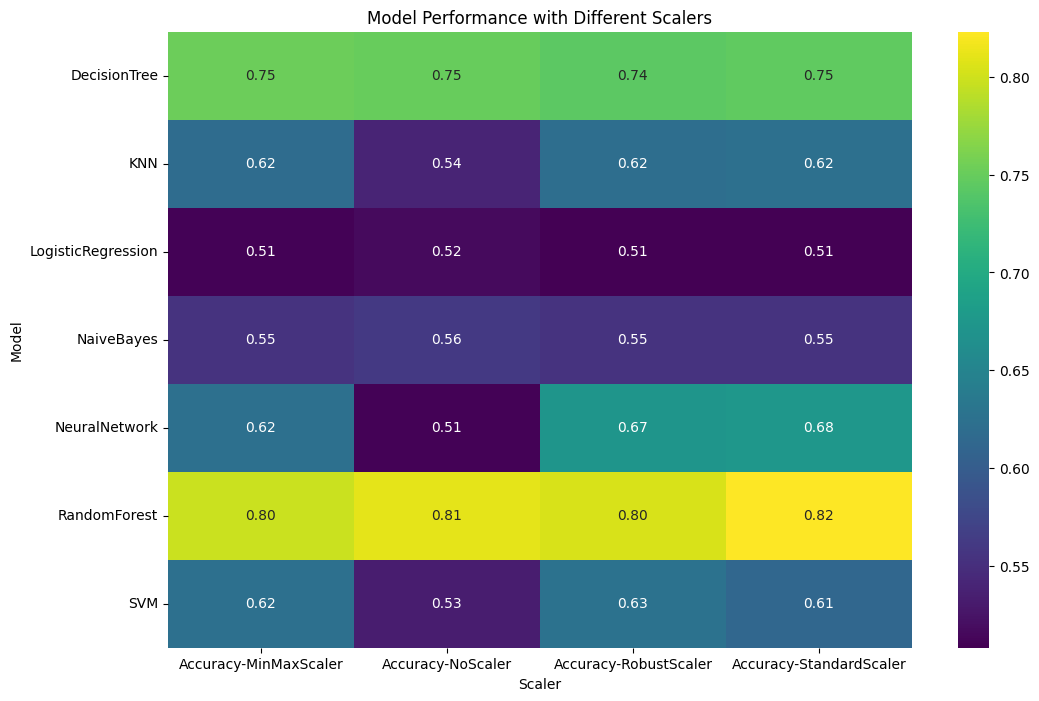

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(results_df, annot=True, cmap='viridis', fmt=".2f")

# Add title and labels
plt.title('Model Performance with Different Scalers')
plt.xlabel('Scaler')
plt.ylabel('Model')

# Show the plot
plt.show()

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Initialize scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Initialize models
models = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': svm.SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'NaiveBayes': GaussianNB(),
    'NeuralNetwork': MLPClassifier(max_iter=3000)
}

# Initialize a dictionary to store results
results = {}

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each scaler and model, apply them, and evaluate performance
for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)
    
    for model_name, model in models.items():
        scores = cross_val_score(model, X_scaled, y, cv=kf)
        results[(model_name, scaler_name)] = scores.mean()

# Add results for models without normalization
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf)
    results[(model_name, 'NoScaler')] = scores.mean()

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.index = pd.MultiIndex.from_tuples(results_df.index, names=['Model', 'Scaler'])
results_df = results_df.unstack(level='Scaler')

c:\Users\anast\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\anast\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [45]:
# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.index = pd.MultiIndex.from_tuples(results_df.index, names=['Model', 'Scaler'])
results_df = results_df.unstack(level='Scaler')

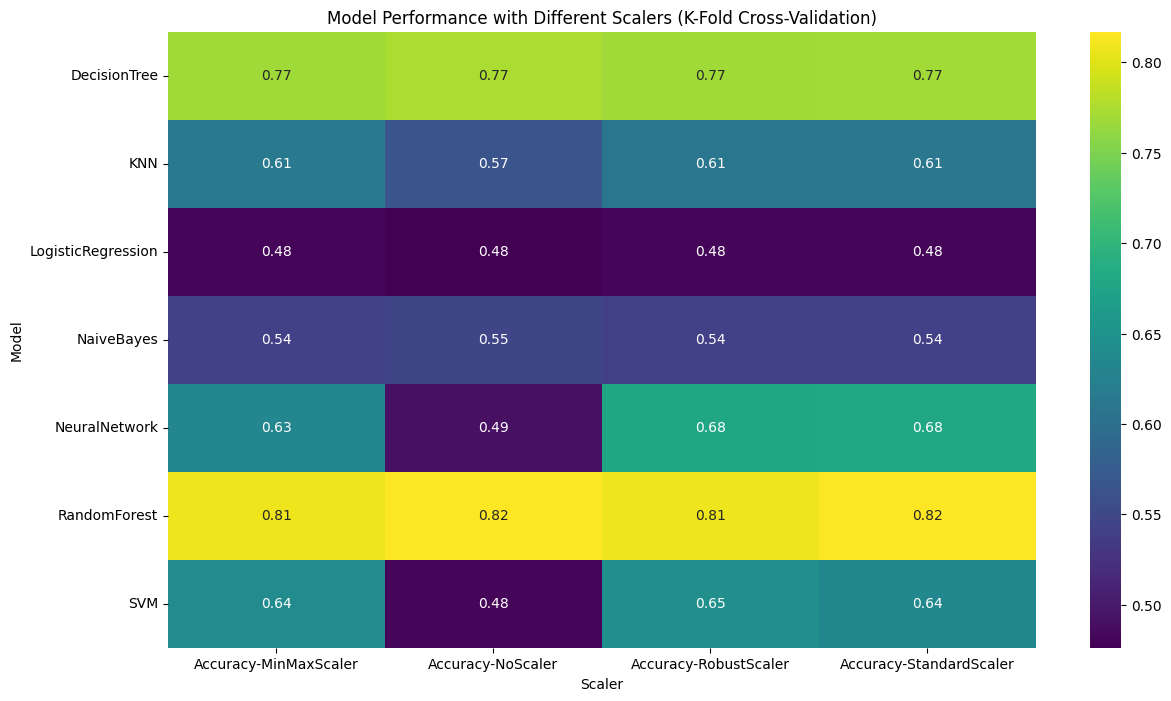

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a heatmap
sns.heatmap(results_df, annot=True, cmap='viridis', fmt=".2f")

# Add title and labels
plt.title('Model Performance with Different Scalers (K-Fold Cross-Validation)')
plt.xlabel('Scaler')
plt.ylabel('Model')

# Show the plot
plt.show()

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Initialize scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Initialize models
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42), 
    'AdaBoost': AdaBoostClassifier(random_state=42), 
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# Initialize a dictionary to store results
results = {}

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each scaler and model, apply them, and evaluate performance
for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)
    
    for model_name, model in models.items():
        scores = cross_val_score(model, X_scaled, y, cv=kf)
        results[(model_name, scaler_name)] = scores.mean()

# Add results for models without normalization
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf)
    results[(model_name, 'NoScaler')] = scores.mean()

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.index = pd.MultiIndex.from_tuples(results_df.index, names=['Model', 'Scaler'])
results_df = results_df.unstack(level='Scaler')

In [56]:
# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.index = pd.MultiIndex.from_tuples(results_df.index, names=['Model', 'Scaler'])
results_df = results_df.unstack(level='Scaler')

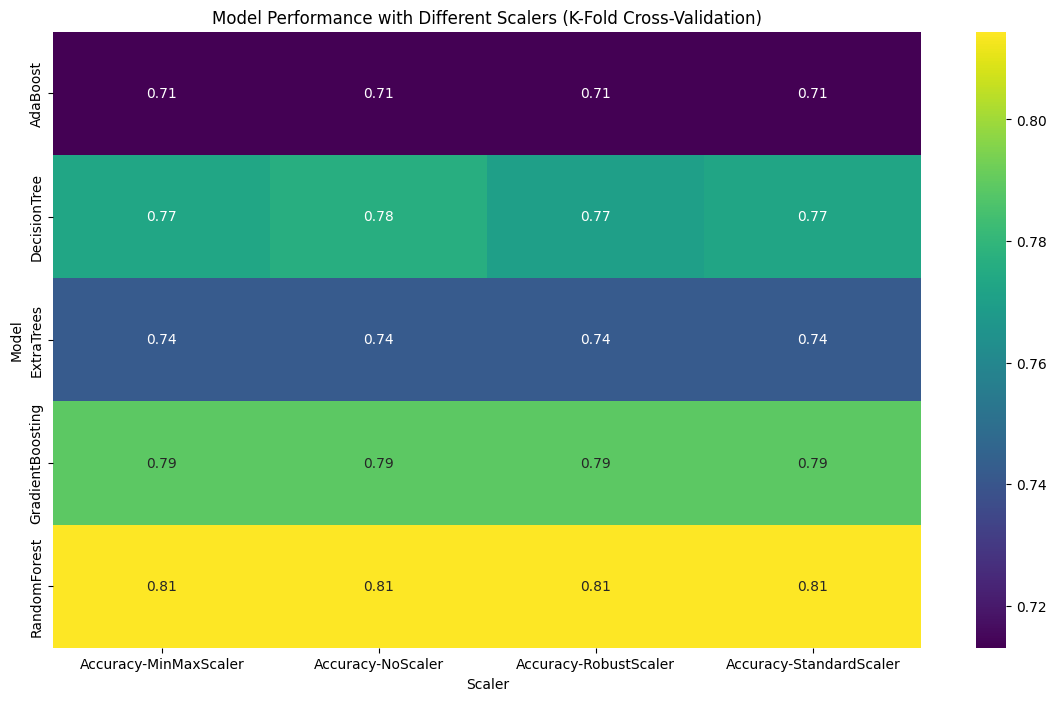

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a heatmap
sns.heatmap(results_df, annot=True, cmap='viridis', fmt=".2f")

# Add title and labels
plt.title('Model Performance with Different Scalers (K-Fold Cross-Validation)')
plt.xlabel('Scaler')
plt.ylabel('Model')

# Show the plot
plt.show()

In [58]:
from scipy.stats import truncnorm, randint

from scipy import stats
#decTree_param_dist = {
#    'n_estimators': [50, 100, 200],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'bootstrap': [True, False]
#}

decTree_param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [59]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

model = GradientBoostingClassifier(random_state=42)
cv = GridSearchCV(estimator=model, param_grid=decTree_param_dist, cv=5, n_jobs=-1, verbose=2)

#Prepare optimization
#randomCV = RandomizedSearchCV(model, scoring=scoring_metrics,
#                              param_distributions=decTree_param_dist, refit='neg_mean_absolute_error', 
#                              cv=cv, n_jobs=-1, n_iter=100)

grid_search = GridSearchCV(estimator=model, param_grid=decTree_param_dist, cv=5, n_jobs=-1, verbose=2)

In [60]:
print(f"Optimizing hyperparameters with a randomized search...")
startTime = time.perf_counter()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_search.fit(X_train_scaled, y_train)
endTime = time.perf_counter()
print(f"Parameters optimized in {endTime - startTime:0.4f} seconds.")

best_random_params = grid_search.best_params_

Optimizing hyperparameters with a randomized search...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Parameters optimized in 346.8917 seconds.


In [61]:
print(best_random_params)

{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}


In [62]:
# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)

Test set accuracy:  0.8395833333333333


In [64]:
from scipy.stats import randint, uniform

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter distribution for Randomized Search
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'subsample': uniform(0.8, 0.2)
}

# Initialize the GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Initialize Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

print(f"Optimizing hyperparameters with a randomized search...")
startTime = time.perf_counter()

# Fit Randomized Search to the training data
random_search.fit(X_train_scaled, y_train)

endTime = time.perf_counter()
print(f"Parameters optimized in {endTime - startTime:0.4f} seconds.")

# Get the best parameters
best_random_params = random_search.best_params_
print("Best parameters found: ", best_random_params)

# Evaluate the best model on the test set
best_gb_random = random_search.best_estimator_
y_pred_random = best_gb_random.predict(X_test_scaled)

# Calculate accuracy
accuracy_random = accuracy_score(y_test, y_pred_random)
print("Test set accuracy: ", accuracy_random)

Optimizing hyperparameters with a randomized search...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Parameters optimized in 32.3354 seconds.
Best parameters found:  {'learning_rate': np.float64(0.13487080962675865), 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 183, 'subsample': np.float64(0.8913069140965821)}
Test set accuracy:  0.825


In [ ]:
def test_model(model, X: pd.DataFrame, Y: pd.DataFrame):
    #Prepare testing objects
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

    #Training and testing
    cv_results = cross_validate(model, X, Y, scoring=scoring_metrics,
     cv=cv, n_jobs=-1)

    AccuScores = cv_results['test_accuracy']
    Prec0Scores = cv_results['test_precision_0']
    Prec1Scores = cv_results['test_precision_1']
    Rec0Scores = cv_results['test_recall_0']
    Rec1Scores = cv_results['test_recall_1']
    F10Scores = cv_results['test_f1_0']
    F11Scores = cv_results['test_f1_1']

    return { 
        'Accuracy': np.mean(AccuScores),
        'Precision 0': np.mean(Prec0Scores),
        'Precision 1': np.mean(Prec1Scores),
        'Recall 0': np.mean(Rec0Scores),
        'Recall 1': np.mean(Rec1Scores),
        'F1 0': np.mean(F10Scores),
        'F1 1': np.mean(F11Scores)
    }

# Prikaz rezultata razlicitim algoritmima redukcije kolona